In [22]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

import sys
sys.path.append('./libs')

import agent

# The Perceptual Shaping of Anticipatory Actions

### Simulation parameters definition

In [2]:
time = 5000

In [3]:
f_mag = 700
f_time = 200
f_start = 1000

f = np.concatenate([np.zeros(f_start),np.ones(f_time)*f_mag,np.zeros(time-(f_start+f_time))])

In [4]:
dist_mag = 1.
dist_time = 500
dist_start = 700

x_dist = np.concatenate([np.zeros(dist_start),np.ones(dist_time)*dist_mag,np.zeros(time-(dist_start+dist_time))])

In [5]:
prox_mag = 1.
prox_time = 200
prox_start = 1000

x_prox = np.concatenate([np.zeros(prox_start),np.ones(prox_time)*prox_mag,np.zeros(time-(prox_start+prox_time))])

### FEL and HSPC agents definition

In [6]:
a_fel = agent.Agent(ctrl_scheme='fel',beta_s=[1.5,1.5], mass=650., mass_pole = 250.)
a_hspc = agent.Agent(ctrl_scheme='hspc',beta_s=[1.5,17], mass=650., mass_pole = 250.)

In [ ]:
a_fel.plant_reset()
a_hspc.plant_reset()
a_fel.ff_reset()
a_hspc.ff_reset()

## Section 2.1.1: Acquisition

In [ ]:
log_s_fel = []
log_s_hspc = []

In [8]:
for tr in range(80):
    
    log_fel = np.zeros([time,5])
    log_hspc = np.zeros([time,5])
    
    a_fel.plant_reset()
    a_hspc.plant_reset()
    
    a_fel.ff_start()
    a_hspc.ff_start()
    
    for t in range(time):
        p,th,lv,av,u_ff = a_fel.update(f[t],x_dist[t],x_prox[t])
        log_fel[t,:]=np.array([p,th,lv,av,u_ff])
        
        p,th,lv,av,u_ff = a_hspc.update(f[t],x_dist[t],x_prox[t])
        log_hspc[t,:]=np.array([p,th,lv,av,u_ff])
    
    a_fel.ff_update()
    a_hspc.ff_update()
    
    log_s_fel.append(log_fel)
    log_s_hspc.append(log_hspc)
    


a_fel_gen = deepcopy(a_fel)
a_hspc_gen = deepcopy(a_hspc)  

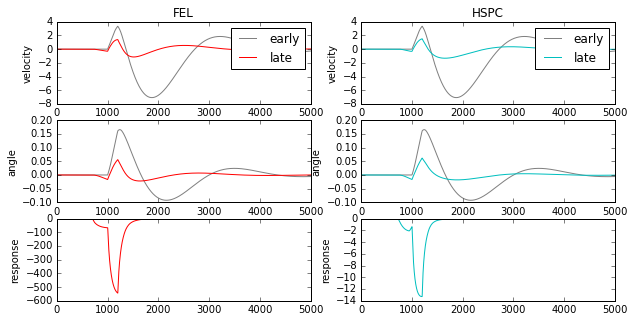

In [19]:
plt.figure(figsize=(10,5))


plt.subplot(3,2,1)
plt.plot(log_s_fel[0][:,0],label='early',c='gray')
plt.plot(log_s_fel[-1][:,0],label='late',c='r')
plt.title('FEL')
plt.ylabel('velocity')
plt.legend()

plt.subplot(3,2,3)
plt.plot(log_s_fel[0][:,1],c='gray')
plt.plot(log_s_fel[-1][:,1],c='r')
plt.ylabel('angle')


plt.subplot(3,2,5)
plt.plot(log_s_fel[0][:,4],c='gray')
plt.plot(log_s_fel[-1][:,4],c='r')
plt.ylabel('response')


plt.subplot(3,2,2)
plt.plot(log_s_hspc[0][:,0],label='early',c='gray')
plt.plot(log_s_hspc[-1][:,0],label='late',c='c')
plt.title('HSPC')
plt.ylabel('velocity')
plt.legend()

plt.subplot(3,2,4)
plt.plot(log_s_hspc[0][:,1],c='gray')
plt.plot(log_s_hspc[-1][:,1],c='c')
plt.ylabel('angle')

plt.subplot(3,2,6)
plt.plot(log_s_hspc[0][:,4],c='gray')
plt.plot(log_s_hspc[-1][:,4],c='c')
plt.ylabel('response')


## Section 2.1.2: Robustness

In [10]:
log_s_fel_cth = []
log_s_hspc_cth = []

In [21]:
for tr in range(1):
    
    log_fel = np.zeros([time,5])
    log_hspc = np.zeros([time,5])
    
    a_fel.plant_reset()
    a_hspc.plant_reset()
    
    a_fel.ff_start()
    a_hspc.ff_start()
    
    for t in range(time):
        p,th,lv,av,u_ff = a_fel.update(0,x_dist[t],0)
        log_fel[t,:]=np.array([p,th,lv,av,u_ff])
        
        p,th,lv,av,u_ff = a_hspc.update(0,x_dist[t],0)
        log_hspc[t,:]=np.array([p,th,lv,av,u_ff])
    
    a_fel.ff_update()
    a_hspc.ff_update()
    
    log_s_fel_cth.append(log_fel)
    log_s_hspc_cth.append(log_hspc)
    
    print '>>> trial: '+str(tr)


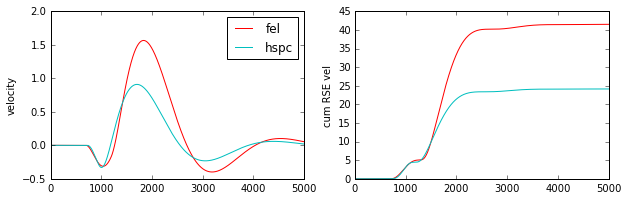

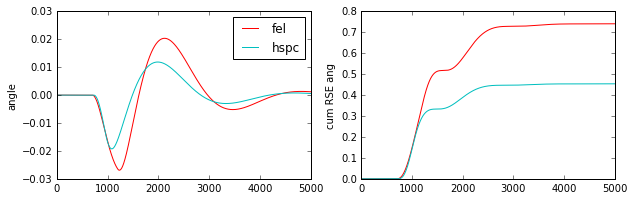

In [20]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(log_s_fel_cth[0][:,0],label='fel',c='r')
plt.plot(log_s_hspc_cth[0][:,0],label='hspc',c='c')
plt.ylabel('velocity')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.sqrt(np.cumsum(log_s_fel_cth[0][:,0]**2)),c='r')
plt.plot(np.sqrt(np.cumsum(log_s_hspc_cth[0][:,0]**2)),c='c')
plt.ylabel('cum RSE vel')


plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(log_s_fel_cth[0][:,1],label='fel',c='r')
plt.plot(log_s_hspc_cth[0][:,1],label='hspc',c='c')
plt.ylabel('angle')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.sqrt(np.cumsum(log_s_fel_cth[0][:,1]**2)),c='r')
plt.plot(np.sqrt(np.cumsum(log_s_hspc_cth[0][:,1]**2)),c='c')
plt.ylabel('cum RSE ang')

## Section 2.1.3: Generalization

In [13]:
log_s_fel_gen = []
log_s_hspc_gen = []

In [14]:
inc_w = 1.3

a_fel_gen.mass_pole = 250.*inc_w
a_hspc_gen.mass_pole = 250.*inc_w

In [15]:
for tr in range(35):
    
    log_fel = np.zeros([time,5])
    log_hspc = np.zeros([time,5])
    
    a_fel_gen.plant_reset()
    a_hspc_gen.plant_reset()
    
    a_fel_gen.ff_start()
    a_hspc_gen.ff_start()
    
    for t in range(time):
        p,th,lv,av,u_ff = a_fel_gen.update(f[t],0.,x_prox[t])
        log_fel[t,:]=np.array([p,th,lv,av,u_ff])
        
        p,th,lv,av,u_ff = a_hspc_gen.update(f[t],0.,x_prox[t])
        log_hspc[t,:]=np.array([p,th,lv,av,u_ff])
    
    a_fel_gen.ff_update()
    a_hspc_gen.ff_update()
    
    log_s_fel_gen.append(log_fel)
    log_s_hspc_gen.append(log_hspc)

In [16]:
for tr in range(5):
    
    log_fel = np.zeros([time,5])
    log_hspc = np.zeros([time,5])
    
    a_fel_gen.plant_reset()
    a_hspc_gen.plant_reset()
    
    a_fel_gen.ff_start()
    a_hspc_gen.ff_start()
    
    for t in range(time):
        p,th,lv,av,u_ff = a_fel_gen.update(f[t],x_dist[t],x_prox[t])
        log_fel[t,:]=np.array([p,th,lv,av,u_ff])
        
        p,th,lv,av,u_ff = a_hspc_gen.update(f[t],x_dist[t],x_prox[t])
        log_hspc[t,:]=np.array([p,th,lv,av,u_ff])
    
    a_fel_gen.ff_update()
    a_hspc_gen.ff_update()
    
    log_s_fel_gen.append(log_fel)
    log_s_hspc_gen.append(log_hspc)

In [17]:
lq_fel_a = [np.sqrt(np.cumsum(l[:,1]**2))[-1] for l in log_s_fel+log_s_fel_gen]
lq_hspc_a = [np.sqrt(np.cumsum(l[:,1]**2))[-1] for l in log_s_hspc+log_s_hspc_gen]

lq_fel_v = [np.sqrt(np.cumsum(l[:,0]**2))[-1] for l in log_s_fel+log_s_fel_gen]
lq_hspc_v = [np.sqrt(np.cumsum(l[:,0]**2))[-1] for l in log_s_hspc+log_s_hspc_gen]




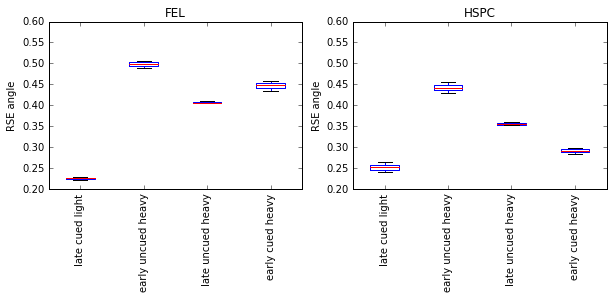

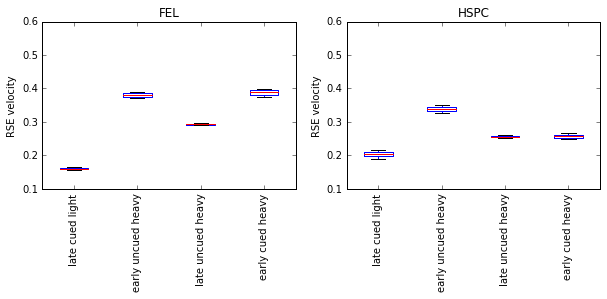

In [18]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('FEL')
bplot = plt.boxplot([lq_fel_a[75:80]/lq_fel_a[0],
                     lq_fel_a[80:85]/lq_fel_a[0],
                     lq_fel_a[110:115]/lq_fel_a[0],
                     lq_fel_a[-5:]/lq_fel_a[0]])
plt.ylim(.2,.6)
plt.ylabel('RSE angle')
plt.gca().set_xticklabels(['late cued light',
                           'early uncued heavy',
                           'late uncued heavy',
                           'early cued heavy'],rotation=90)


plt.subplot(1,2,2)
plt.title('HSPC')
bplot = plt.boxplot([lq_hspc_a[75:80]/lq_hspc_a[0],
                     lq_hspc_a[80:85]/lq_hspc_a[0],
                     lq_hspc_a[110:115]/lq_hspc_a[0],
                     lq_hspc_a[-5:]/lq_hspc_a[0]])
plt.ylim(.2,.6)
plt.ylabel('RSE angle')
plt.gca().set_xticklabels(['late cued light',
                           'early uncued heavy',
                           'late uncued heavy',
                           'early cued heavy'],rotation=90)


plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('FEL')
bplot = plt.boxplot([lq_fel_v[75:80]/lq_fel_v[0],
                     lq_fel_v[80:85]/lq_fel_v[0],
                     lq_fel_v[110:115]/lq_fel_v[0],
                     lq_fel_v[-5:]/lq_fel_v[0]])

plt.ylim(.1,.6)
plt.ylabel('RSE velocity')
plt.gca().set_xticklabels(['late cued light',
                           'early uncued heavy',
                           'late uncued heavy',
                           'early cued heavy'],rotation=90)


plt.subplot(1,2,2)
plt.title('HSPC')
bplot = plt.boxplot([lq_hspc_v[75:80]/lq_hspc_v[0],
                     lq_hspc_v[80:85]/lq_hspc_v[0],
                     lq_hspc_v[110:115]/lq_hspc_v[0],
                     lq_hspc_v[-5:]/lq_hspc_v[0]])

plt.ylim(.1,.6)
plt.ylabel('RSE velocity')
plt.gca().set_xticklabels(['late cued light',
                           'early uncued heavy',
                           'late uncued heavy',
                           'early cued heavy'],rotation=90)